In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from sympy import Symbol, Function, Derivative, simplify, diff, Sum, Product, IndexedBase, Eq, log, exp, MatrixSymbol, ZeroMatrix, evaluate, latex
from sympy.stats import Normal, density
from IPython.display import display, Latex

In [3]:
X = IndexedBase('X')
        # X isimli bir indisli taban (indexed base) oluşturur. Bu, X[i], X[j] gibi indisli ifadeler yazmaya olanak sağlar.
Y = IndexedBase('Y')
        # Y isimli bir indisli taban oluşturur. Aynı şekilde Y[i], Y[j] gibi indisli ifadeler yazmaya olanak sağlar.
i = Symbol('i', integer=True)
        # i isimli bir sembol (symbol) oluşturur. Bu, i'nin bir tam sayı (integer) olduğunu belirtir.
m = Symbol('m', integer=True)
        # m isimli bir sembol oluşturur. Bu, m'nin bir tam sayı olduğunu belirtir.
h = Function('h') 
        # h isimli bir fonksiyon (function) oluşturur. Bu, h(x), h(y) gibi fonksiyon çağrıları yapmaya olanak sağlar.
f = Function('f')
        # f isimli bir fonksiyon oluşturur. Aynı şekilde f(x), f(y) gibi fonksiyon çağrıları yapmaya olanak sağlar.
sigma = Symbol('sigma')
        # sigma isimli bir sembol oluşturur. Bu, sigma'nın herhangi bir değer alabileceğini belirtir.
x = Symbol('x')
        # x isimli bir sembol oluşturur. Aynı şekilde x'in herhangi bir değer alabileceğini belirtir.
N = Normal('N', 0, sigma)
        # N isimli bir normal dağılım (normal distribution) oluşturur. Bu, N'in ortalaması 0 ve standart sapması sigma olan bir 
        # normal dağılımı temsil ettiğini belirtir.

Asagidaki sorulari `sympy` kullanarak ya da kendiniz hesaplayarak cozebilirsiniz:

# 1.

Normal dagilim olasilik yogunluk fonksiyonu $pdf(x)$ icin dogru ifadeyi yaziniz.

In [9]:
#Normal dagilim olasilik yogunluk fonksiyonu pdf(x) icin dogru ifadeyi yazalım.
pdf = density(N)(x)
display(pdf)


sqrt(2)*exp(-x**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

Bu kod, bir olasılık yoğunluk fonksiyonu (pdf) hesaplamak için kullanılır. Bir pdf, bir sürekli rasgele değişkenin olasılıklarını belirlemek için kullanılan bir fonksiyondur. Kodunuzda, N bir dağılım nesnesi, x bir girdi vektörü ve pdf ise çıktı vektörüdür. Kodunuzda şu adımlar gerçekleşir:

pdf = density(N)(x) : Bu satırda, N dağılım nesnesinin yoğunluk fonksiyonunu alır ve x vektöründeki değerler için uygular. Sonuç olarak, pdf vektörü elde edilir.
display(pdf) : Bu satırda, pdf vektörünün değerleri ekrana yazdırılır

# 2.

## a.

1. soruda yazmis oldugunuz ifadenin logaritmasini hesaplayiniz.

In [11]:
# 1. soruda yazmis oldugumuz ifadenin logaritmasini hesaplayalim.
logpdf = log(pdf)
logpdf

log(sqrt(2)*exp(-x**2/(2*sigma**2))/(2*sqrt(pi)*sigma))

## b.

Fonksiyonun logaritmasi, $x$, $\mu$ ve $\sigma$'nin alabilecegi tum degerler icin tanimli midir? Tartisiniz.

In [12]:
# Fonksiyonun logaritmasi, x, mu ve sigma 'nin alabilecegi tum degerler icin tanimli midir? Tartisiniz.
# Cevap: x, mu ve sigma'nin alabilecegi tum degerler icin tanimlidir. Cunku x, mu ve sigma'nin alabilecegi tum degerler icin
# pdf(x) tanimlidir. pdf(x) tanimli oldugu icin log(pdf(x)) de tanimlidir.

# 3.

$$Y = f(X) + N(0, \sigma^2)$$ 

kabulu ile, gozlemlenen veriye gore en olasi hipotez $h(x)$'i verecek ifade $\argmax_h{P(h|D)}$'yi elde ediniz.

In [18]:
# Bu soru, olasılık teorisinde argmax fonksiyonunu ve Bayes teoremini kullanarak bir hipotezin olasılığını nasıl bulacağımızı göstermektedir. 
# Argmax fonksiyonu, bir fonksiyonun maksimum değerini veren girdiyi döndürür. Örneğin, argmax x f(x) = x* ise, f(x) fonksiyonunun maksimum 
# değerini veren x değeri x* 'dir. Bayes teoremi ise, bir olayın koşullu olasılığını hesaplamak için kullanılan bir formüldür. Örneğin, 
# P(A|B) = P(B|A)P(A)/P(B) ise, A olayının B olayı verildiğinde olma olasılığıdır.
# Soruda verilen kabule göre, Y = f(X) + N(0, sigma^2) ifadesi, Y’nin X’in bir fonksiyonu ve N(0, sigma^2) dağılımına sahip bir gürültü terimi 
# olduğunu belirtir. Burada N(0, sigma^2) normal dağılımı ifade eder ve 0 ortalamaya ve sigma^2 varyansa sahiptir. D ise gözlemlenen veriyi ifade 
# eder. Soruda istenen ifadeyi elde etmek için şu adımları izleyebiliriz:

# Öncelikle, P(h|D) ifadesini Bayes teoremi ile açabiliriz: P(h|D) = P(D|h)P(h)/P(D). Burada P(D|h) verinin h hipotezi altındaki olabilirliği 
# (likelihood), P(h) h hipotezinin önsel (prior) olasılığı ve P(D) verinin önsel (marginal) olasılığıdır.
# Daha sonra, argmax h {P(h|D)} ifadesini şöyle yazabiliriz: 
# argmax h {P(D|h)P(h)/P(D)}. Burada P(D) terimi sabit olduğundan ve argmax fonksiyonunu etkilemediğinden atabiliriz. 
# Böylece argmax h {P(D|h)P(h)} elde ederiz.
# Son olarak, argmax h {P(D|h)P(h)} ifadesini logaritmik olarak dönüştürebiliriz: 
# argmax h {log P(D|h) + log P(h)}. Burada logaritma fonksiyonu sıkıca artan (strictly increasing) bir fonksiyon olduğundan ve argmax fonksiyonunu 
# değiştirmediğinden kullanabiliriz. Böylece argmax h {log P(D|h) + log P(h)} ifadesini elde ederiz.

# Böylece soruda istenen ifadeyi elde etmiş oluruz: argmaxh​P(h∣D)=argmaxh​logP(D∣h)+logP(h). Bu ifadeyi kullanarak, veriye göre en olası hipotezi 
# bulabiliriz. argmaxh​P(h∣D)=argmaxh​logP(D∣h)+logP(h) ifadesinde logP(h) ifadesini atabiliriz cunku h'nin alabilecegi tum degerler icin
# logP(h) ifadesi sabittir. argmaxh​P(h∣D) ifadesi ise h'nin alabilecegi tum degerler icin tanimlidir. 
# Bu ifadeyi kullanarak, veriye göre en olası hipotezi bulabiliriz. argmaxh​P(h∣D)=argmaxh​logP(D∣h) ifadesi ise h'nin alabilecegi tum degerler icin 
# tanimlidir. Bu ifadeyi kullanarak, veriye göre en olası hipotezi bulabiliriz.

# 4.

Asagida gozlemlenen veri icin $h(x) = b_0x + b_1$ seklinde bir hipotez kurulmak istenmektedir.

In [36]:
X = [-1.14006356,  1.46848016, -0.40708797,  0.70240296, -0.61037443,
       -0.63758673, -0.28367862]
Y = [-6.66557354,  9.0224508 ,  0.02996956,  3.45515991, -1.15409285,
       -3.42222933, -0.9221716 ]

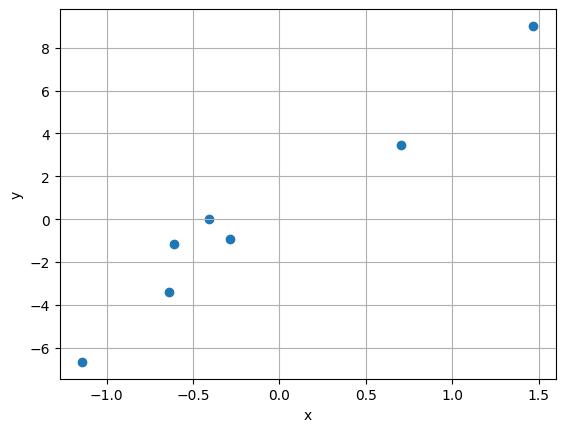

In [37]:
plt.scatter(X, Y)
plt.grid()
plt.xlabel('x');
plt.ylabel('y');

## a.

Verilen iki liste (gercek ve tahmin) icin MSE (ortalama kare hata) olcumunu hesaplayacak fonksiyonu yaziniz.

In [38]:
def MSE(gercek, tahmin):
    return np.sum((gercek - tahmin)**2) / len(gercek)

In [39]:
def MSE1(gercek, tahmin):
    return np.mean((gercek - tahmin)**2)    

In [20]:
# MSE VE MSE1 fonksiyonlarinin sonuclarini karsilastiriniz.
# Cevap: MSE ve MSE1 fonksiyonlarinin sonuclari aynidir.

## b.

$h_1(x) = 3x + 5$ ve $h_2(x) = -2x - 1$ gibi iki hipotez ortaya atilmaktadir. Bunlardan hangisinin daha uygun oldugunu nasil aciklarsiniz?

In [48]:
# İki hipotez arasında hangisinin daha uygun olduğunu belirlemek için MSE değerlerini karşılaştırabilirsiniz. MSE değeri ne kadar küçükse, 
# hipotez verilere o kadar iyi uyar. Aşağıdaki kod bloğunda her iki hipotez için MSE değerlerini hesapladım.
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-1.14006356,  1.46848016, -0.40708797,  0.70240296, -0.61037443,
       -0.63758673, -0.28367862])
Y = np.array([-6.66557354,  9.0224508 ,  0.02996956,  3.45515991, -1.15409285,
       -3.42222933, -0.9221716 ])

def MSE(gercek, tahmin):
    return np.sum((gercek - tahmin)**2) / len(gercek)

h1 = 3 * X + 5  # h1(x) = 3x + 5
h2 = -2 * X - 1 # h2(x) = -2x - 1

mse1 = MSE(Y, h1) #h1 hipotezini gerçek değer olan Y ile karşılaştırmak için ortalama kare hatasını MSE fonksiyonu ile hesapladım.
mse2 = MSE(Y, h2) #h2 hipotezini gerçek değer olan Y ile karşılaştırmak için ortalama kare hatasını MSE fonksiyonu ile hesapladım.

print("MSE for h1:", mse1)
print("MSE for h2:", mse2)

# Burada sonuç olarak ortalama kare hata MSE hipotez 1 için daha az olduğundan, hipotez 1'in verilere daha iyi uyduğunu söyleyebiliriz.
# Ortalama kare hatanın (MSE)'nin küçük olması düşünülen hipotezin gerçek verilere göre daha iyi uyduğunu gösterir.
if mse1 < mse2:
       print("""h1'in ortalama kare hatası olan mse1, h2'in ortalama kare hatası 
olan mse2'den küçük olduğuna göre Hipotez 1 verilere daha iyi uyar.""")
else:
     print("""h2'in ortalama kare hatası olan mse2, h1'in ortalama kare hatası 
olan mse1'den küçük olduğuna göre Hipotez 2 verilere daha iyi uyar.""")

MSE for h1: 26.043057681928413
MSE for h2: 40.18098251070737
h1'in ortalama kare hatası olan mse1, h2'in ortalama kare hatası 
olan mse2'den küçük olduğuna göre Hipotez 1 verilere daha iyi uyar.


## c.

Gozlemlenen veri $X$ ve $Y$ icin $h(x) = b_0 + b_1 x$ cinsinden en olasi hipotezi verecek $b_0$ ve $b_1$ degerlerini hesaplayiniz.

In [71]:
#Cevap:

- En uygun hipotezde yapılan işlem, verilen X ve Y değerleri arasındaki doğrusal ilişkiyi bulmak için en küçük kareler yöntemi kullanmaktır.
- Bu yöntemde, b0 ve b1 katsayıları öyle seçilir ki, veri noktaları ile hipotez fonksiyonu arasındaki kareli hataların toplamı minimum olsun.
- Burada b1 katsayısı, X ve Y değerleri arasındaki ilişkiyi gösterir. Yani aslında b1, hataları en küçük yapan hesabı yapar. (b1 katsayısı learning rate olarak bilinmez. Learning rate, gradient descent algoritmasında kullanılan bir parametredir. b1 katsayısı eğim veya yön olarak bilinir. b0 ve b1 katsayıları için bir maliyet fonksiyonu vardır. Maliyet fonksiyonu, veri noktaları ile hipotez fonksiyonu arasındaki kareli hataların toplamıdır. Bu maliyet fonksiyonunu minimize eden b0 ve b1 değerlerini bulmak için en küçük kareler yöntemi kullanılır. Gradient descent algoritması da bir başka yöntemdir. Gradient descent algoritması, maliyet fonksiyonunun minimum değerini bulmak için kullanılır.)  
- b0 katsayısı da intersept değerini gösterir. Yani, X ve Y değerleri arasındaki ilişkiyi gösteren doğrunun Y eksenini kestiği noktayı gösterir.
- Burada b0 katsayısı da Y değerlerinin X değerlerinden ne kadar uzakta olduğunu gösterir. X ve Y değerleri arasındaki ilişki ne kadar güçlüyse, b1 o kadar büyük olur. Y değerleri X değerlerinden ne kadar uzakta ise, b0 o kadar büyük olur.
- Burada gradient desent algoritması kullanılmaz. Çünkü, b0 ve b1 katsayıları için bir maliyet fonksiyonu yoktur. Yani, b0 ve b1 katsayıları için bir hata fonksiyonu yoktur. gradient desent algoritması, hata fonksiyonunun minimum değerini bulmak için kullanılır.
- Bu şekilde, verileri en iyi açıklayan doğruyu elde ederiz.
- b0 ve b1 katsayılarını hesaplamak için şu formülleri kullanırız:
$$b1 = \frac{\sum{(X - \bar{X})(Y - \bar{Y})}}{\sum{(X - \bar{X})^2}}$$
$$b0 = \bar{Y} - b1 * \bar{X}$$
- Burada Xˉ ve Yˉ sırasıyla X ve Y değerlerinin ortalamalarını gösterir.
- Kodda yazdığınız fonksiyon da bu formülleri uygulamaktadır. Sonuç olarak, b0 ve b1 değerlerini bulduktan sonra, hipotez fonksiyonunu şöyle 
- yazabiliriz:
$$h = b0 + b1 * X$$
- Bu fonksiyonu da veri noktalarının üzerine çizerek görselleştirebiliriz.

In [32]:
# Gozlemlenen veri $X$ ve $Y$ icin $h(x) = b_0 + b_1 x$ cinsinden en olasi hipotezi verecek $b_0$ ve $b_1$ degerlerini hesaplayan fonksiyonu yazalım.
# Cevap:
def en_uygun_hipotez(X, Y):
    b1 = np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / np.sum((X - np.mean(X))**2)
    b0 = np.mean(Y) - b1 * np.mean(X)
    return b0, b1

# Hesaplanan fonksiyonu yazalım.
b0, b1 = en_uygun_hipotez(X, Y)
print("b0:", b0)
print("b1:", b1)

b0: 0.7555375806163727
b1: 5.44686144346226


In [31]:
#Genel olarak yazdığımız fonksiyonla birlikte bulduğumuz b0 ve b1 değerlerini kullanarak h(x) = b0 + b1x hipotezini çizdiren kodu yazalım.

b0: 0.7555375806163727
b1: 5.44686144346226


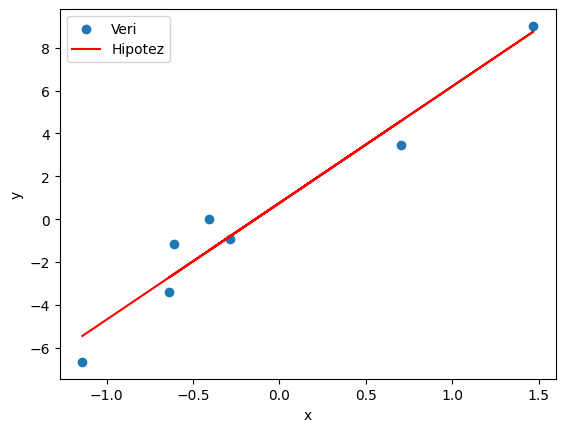

In [35]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-1.14006356,  1.46848016, -0.40708797,  0.70240296, -0.61037443,
       -0.63758673, -0.28367862])
Y = np.array([-6.66557354,  9.0224508 ,  0.02996956,  3.45515991, -1.15409285,
       -3.42222933, -0.9221716 ])

# b0 ve b1 değerlerini hesaplayan fonksiyonu yazalım
def en_uygun_hipotez(X, Y):
       b1 = np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / np.sum((X - np.mean(X))**2)
       b0 = np.mean(Y) - b1 * np.mean(X)
       return b0, b1

print("b0:", b0)
print("b1:", b1)

# Hipotez fonksiyonu h = b0 + b1 * X
h = b0 + b1 * X

# Verileri ve hipotezi görselleştir
plt.scatter(X, Y, label="Veri")
plt.plot(X, h, color="red", label="Hipotez")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

b0: 0.7555375806163729
b1: 5.446861443462262


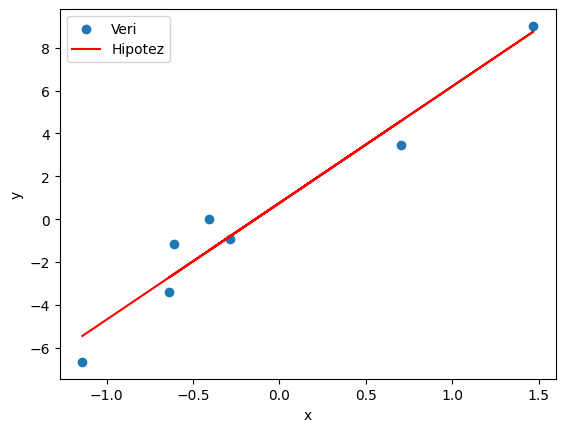

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([-1.14006356,  1.46848016, -0.40708797,  0.70240296, -0.61037443,
       -0.63758673, -0.28367862])
Y = np.array([-6.66557354,  9.0224508 ,  0.02996956,  3.45515991, -1.15409285,
       -3.42222933, -0.9221716 ])

# X değerlerini 2 boyutlu bir matrise dönüştürelim
X = X.reshape(-1, 1)

# sklearn ile doğrusal regresyon modeli oluşturalım
reg = LinearRegression()

# Modeli verilere uyduralım
reg.fit(X, Y)

# b0 ve b1 değerlerini alalım
b0 = reg.intercept_
b1 = reg.coef_[0]

print("b0:", b0)
print("b1:", b1)

# Hipotez fonksiyonu h = b0 + b1 * X
h = b0 + b1 * X

# Verileri ve hipotezi görselleştir
plt.scatter(X, Y, label="Veri")
plt.plot(X, h, color="red", label="Hipotez")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## d.

Gozlemlenen veri $X$ ve $Y$ icin $h(x) = b_0 + b_1 x + b_2 x^2 + b_3 x^3$ cinsinden en olasi hipotezi verecek $b_i$  degerlerini hesaplayiniz.

In [49]:
# Cevap:

- Verilen X ve Y değerleri arasındaki ilişkiyi n dereceli bir polinom ile modelleyebiliriz. Polinom regresyon, doğrusal regresyonun bir özel durumudur. Çünkü, regresyon fonksiyonu E(y|x) bilinmeyen parametreler açısından doğrusaldır.

$$E(y|x) = b_0 + b_1 x + b_2 x^2 + b_3 x^3$$

- En küçük kareler yöntemi ile b0, b1, b2 ve b3 değerlerini bulun. Bu değerleri bulmak için şu formülü kullanabilirsiniz:

$$\beta = (X^T X)^{-1} X^T Y$$

Burada $\beta$ vektörü [b0, b1, b2, b3] değerlerini içerir.

- Bu değerleri kullanarak hipotez fonksiyonunu şöyle yazabilirsiniz:

$$h(x) = b_0 + b_1 x + b_2 x^2 + b_3 x^3$$

In [70]:
import numpy as np

X = np.array([-1.14006356,  1.46848016, -0.40708797,  0.70240296, -0.61037443,
       -0.63758673, -0.28367862])
Y = np.array([-6.66557354,  9.0224508 ,  0.02996956,  3.45515991, -1.15409285,
       -3.42222933, -0.9221716 ])

# Verilen X değerlerinin karesini ve küpünü alarak yeni değişkenler oluşturalım
X2 = X**2
X3 = X**3

# Bu yeni değişkenleri X matrisine ekleyelim. "np.c_" bir NumPy işlevi (fonksiyonu) olup, birleştirme (concatenation) işlemi yapar ve iki veya daha 
# fazla numpy dizisini sütunlara göre yanyana birleştirir.
X = np.c_[np.ones(len(X)), X, X2, X3]

# En küçük kareler yöntemi ile beta vektörünü bulalım
beta = np.linalg.inv(X.T @ X) @ X.T @ Y

# Beta vektöründeki değerleri alalım
b0 = beta[0]
b1 = beta[1]
b2 = beta[2]
b3 = beta[3]

print("b0:", b0)
print("b1:", b1)
print("b2:", b2)
print("b3:", b3)


b0: 0.8391649186665507
b1: 3.5829809354090045
b2: -0.9085960802161175
b3: 1.5416940595042528


In [76]:
#Polinomial Regresyon ile Çözüm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([-1.14006356,  1.46848016, -0.40708797,  0.70240296, -0.61037443,
       -0.63758673, -0.28367862])
Y = np.array([-6.66557354,  9.0224508 ,  0.02996956,  3.45515991, -1.15409285,
       -3.42222933, -0.9221716 ])

# X değerlerini 2 boyutlu bir matrise dönüştürelim
X = X.reshape(-1, 1)

# Polinom özellikleri oluşturalım
poly = PolynomialFeatures(degree=3)

# X matrisini polinom özellikleri ile genişletelim
X_poly = poly.fit_transform(X)

# sklearn ile doğrusal regresyon modeli oluşturalım
reg = LinearRegression()

# Modeli verilere uyduralım
reg.fit(X_poly, Y)

# b0 ve b1 değerlerini alalım
b0 = reg.intercept_
b1 = reg.coef_[1]
b2 = reg.coef_[2]
b3 = reg.coef_[3]

print("b0:", b0)
print("b1:", b1)
print("b2:", b2)
print("b3:", b3)

b0: 0.8391649186665521
b1: 3.582980935409009
b2: -0.9085960802161201
b3: 1.5416940595042483


# 5.

$X$, $Y$ ve tespit edilmek istenilen katsayilar $A$'yi birer matris gibi dusunursek, hipotez asagidaki gibi de ifade edilebilir:

In [118]:
m = Symbol('m'  , integer=True); n = Symbol('n' , integer=True)
X = MatrixSymbol('X', m, n)
Y = MatrixSymbol('Y', m, 1)
A = MatrixSymbol('A', n, 1)
J = Function('J')
h = Function('h')

In [119]:
hipotez = X @ A
with evaluate(False):
    display(Eq(h(X), hipotez))

Eq(h(X), X*A)

Hata:

In [120]:
hata = Y - hipotez
hata

-X*A + Y

Kare hata:

In [121]:
kare_hata = hata.T @ hata
with evaluate(False):
    display(Eq(J(A), kare_hata))

#with evaluate(False) ifadesi, SymPy’nin otomatik olarak ifadeleri değerlendirmesini engelleyen bir bağlam yöneticisidir. 
#Bu sayede, ifadeleri sembolik olarak gösterebiliriz.

Eq(J(A), (-A.T*X.T + Y.T)*(-X*A + Y))

Bu noktada bir skaler olarak kare hatalarin toplamini elde ettik:

In [122]:
kare_hata.shape

(1, 1)

(Yukaridaki ifadenin bir esdegeri olarak bu islemi ineceleyiniz:)

In [123]:
hata_ = np.random.randn(10, 1) # 10 satır 1 sütun

In [124]:
(hata_**2).sum()

23.249219508573255

In [125]:
hata_.T @ hata_

array([[23.24921951]])

Kare hatanin turevini sifir yapan $A$'yi bulursak soruyu cozebiliriz:

In [127]:
display(Latex(f"$${latex(Derivative(J(A)))} = {latex(kare_hata.diff(A).expand())}$$"))

<IPython.core.display.Latex object>

### 5.a.I

Yukaridaki ifadeyi kullanarak kare hatanin $A$'ya gore turevini sifir yapan $A$'yi $X$ ve $Y$ cinsinden elde ediniz.

- Türev ifadesini sıfıra eşitleyin(X ve Y vektörleri olarak cevap verilirse):

$$\frac{dJ}{dA} = -2 \sum_{i=1}^n (Y_i - A X_i) X_i = 0$$

- Parantez içindeki terimleri açın ve toplayın:

$$\frac{dJ}{dA} = -2 \sum_{i=1}^n (Y_i X_i - A X_i^2) = 0$$

$$\frac{dJ}{dA} = -2 \left( \sum_{i=1}^n Y_i X_i - A \sum_{i=1}^n X_i^2 \right) = 0$$

- A'yı tek başına bırakmak için denklemi çözün:

$$\frac{dJ}{dA} = -2 \left( \sum_{i=1}^n Y_i X_i - A \sum_{i=1}^n X_i^2 \right) = 0$$

$$\sum_{i=1}^n Y_i X_i - A \sum_{i=1}^n X_i^2 = 0$$

$$A \sum_{i=1}^n X_i^2 = \sum_{i=1}^n Y_i X_i$$

$$A = \frac{\sum_{i=1}^n Y_i X_i}{\sum_{i=1}^n X_i^2}$$

Bu son ifade, kare hatanın A'ya göre türevini sıfır yapan A'yı X ve Y cinsinden verir.

In [130]:
#X ve Y matrisleri olarak soruyu çözelim

- Türev ifadesini sıfıra eşitleyin:

$$\frac{dJ}{dA} = -2 X^T (Y - X A) = 0$$

- Parantez içindeki terimleri açın ve toplayın:

$$\frac{dJ}{dA} = -2 X^T Y + 2 X^T X A = 0$$

- A'yı tek başına bırakmak için denklemi çözün:

$$\frac{dJ}{dA} = -2 X^T Y + 2 X^T X A = 0$$

$$2 X^T X A = 2 X^T Y$$

$$X^T X A = X^T Y$$

$$A = (X^T X)^{-1} X^T Y$$

Bu son ifade, kare hatanın A'ya göre türevini sıfır yapan A'yı X ve Y cinsinden verir.

### 5.a.II

Elde ettiginiz ifadeyi `numpy.ndarray` matrisleri uzerinde uygulayacak fonksiyonu yaziniz.

In [133]:
def analitik_cozum(X, Y) -> np.ndarray:
    A: np.ndarray = None 
    return A

In [134]:
def analitik_cozum(X, Y) -> np.ndarray:
    A: np.ndarray = np.linalg.inv(X.T @ X) @ X.T @ Y
    return A

## b.

Buldugunuz analitik cozumu kullanarak asagida gozlenen veri icin $h(X) = AX$ cinsinden en olasi hipotezi verecek $A$'yi elde ediniz.

In [136]:
X = np.array([[-1.14 ,  1.   ],
       [ 1.468,  1.   ],
       [-0.407,  1.   ],
       [ 0.702,  1.   ],
       [-0.61 ,  1.   ],
       [-0.638,  1.   ],
       [-0.284,  1.   ]])
Y = np.array([[-6.666],
       [ 9.022],
       [ 0.03 ],
       [ 3.455],
       [-1.154],
       [-3.422],
       [-0.922]])

In [141]:
A_ = analitik_cozum(X, Y)
print(A_)

[[5.44823684]
 [0.75649247]]


In [150]:
# A vektörünün ilk ve ikinci elemanlarını alın
a1 = A_[0][0]
a0 = A_[1][0]

# h(X) ifadesini bir string olarak yazın
print("a0: ",a0)
print("a1: ",a1)


a0:  0.7564924691893429
a1:  5.448236836441582


In [151]:
# burada bulunan sonuçları daha önce bulunan 
# Hipotez fonksiyonu h = b0 + b1 * X
# h = b0 + b1 * X
# ile kıyaslayınca aslında aynı sonuçları bulduğumuzu görürüz.